### 1. Configuração do Ambiente

In [ ]:
#!pip install "cognite-sdk[pandas]" matplotlib seaborn tensorflow plotly -q

import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.stattools import acf
from tsdiffusion_transformed.dataloader import DataLoader
import json
from getpass import getpass
#import tensorflow as tf
#from tensorflow import keras

print("Bibliotecas importadas com sucesso!")

Updated: UnsupervisedStateSegmenter now supports multi-channel (multivariate) series.

Bibliotecas importadas com sucesso!


/root/coppe/3Wve/lib/python3.12/site-packages/ipykernel/ipkernel.py:772: UserWarning: You are using version='7.83.1' of the SDK, however version='7.90.1' is available. To suppress this warning, either upgrade or do the following:
>>> from cognite.client.config import global_config
>>> global_config.disable_pypi_version_check = True
  _threading_Thread_run(self)


In [4]:
import debugpy
debugpy.listen(('0.0.0.0', 5678))

('0.0.0.0', 5678)

In [5]:
os.environ['COGNITE_CLIENT_SECRET'] = getpass("Enter COGNITE_CLIENT")

### 2. Ativar o DataLoader

In [6]:
import importlib
import sys
importlib.reload(sys.modules['tsdiffusion_transformed.dataloader'])
from tsdiffusion_transformed.dataloader import DataLoader
dl = DataLoader()
dl.add_segments(segments=6, window=40, step=40, series=[
    'PH (CBM) 1st Stg ActCompr Poly Head',
    'PH (CBM) 1st Stage ActShaft Power',
    'PH (CBM) 1st Stg ActCompr Poly Head',
    'PH (CBM) 1st Stage ActPress Ratio'  
], path="segmenter_model.pkl"
)
#dl.segmenter.save("segmenter_model_20.pkl")



Buscando dados para as 12 séries temporais encontradas.


### 5. Análise de Séries Temporais

### 6. Análise Exploratória dos Dados (EDA)

Com os dados coletados e as colunas renomeadas, podemos realizar uma análise mais clara e informativa.

#### 6.1. Informações e Estatísticas Descritivas

In [4]:
df_data_descriptive = dl.df
if not df_data_descriptive.empty:
    print("Informações Gerais do DataFrame:")
    df_data_descriptive.info()

    print("\n\nEstatísticas Descritivas:")
    display(df_data_descriptive.describe())
else:
    print("DataFrame de dados está vazio.")

Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269800 entries, 2019-09-01 03:00:16 to 2019-12-01 02:40:14
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   PH (CBM) 1st Stage ExpPress Ratio     257216 non-null  float64
 1   PH (CBM) 1st Stage Poly Head Dev      257214 non-null  float64
 2   PH (CBM) 1st Stage ActShaft Power     257197 non-null  float64
 3   PH (CBM) 1st Stage Press Rat Dev      257221 non-null  float64
 4   PH (CBM) 1st Stg ActCompr Poly Head   257178 non-null  float64
 5   PH (CBM) 1st Stage Shft Pwr Dev       257223 non-null  float64
 6   PH (CBM) 1st Stage ActCompr Poly Eff  257177 non-null  float64
 7   PH (CBM) 1st Stage ExpCompr Poly Eff  257184 non-null  float64
 8   PH (CBM) 1st Stage ExpShaft Power     257213 non-null  float64
 9   PH (CBM) 1st Stage ActPress Ratio     257022 non-null  float64
 10  P

,PH (CBM) 1st Stage ExpPress Ratio,PH (CBM) 1st Stage Poly Head Dev,PH (CBM) 1st Stage ActShaft Power,PH (CBM) 1st Stage Press Rat Dev,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage Shft Pwr Dev,PH (CBM) 1st Stage ActCompr Poly Eff,PH (CBM) 1st Stage ExpCompr Poly Eff,PH (CBM) 1st Stage ExpShaft Power,PH (CBM) 1st Stage ActPress Ratio,PH (CBM) 1st Stg ExpCompr Poly Head,states
count,257216.000000,257214.000000,257197.000000,257221.000000,257178.000000,257223.000000,257177.000000,257184.000000,257213.000000,257022.000000,257219.000000,269800.000000
mean,3.076324,14.519883,9104.711323,18.470310,164.708592,9.839917,83.518122,80.171857,8290.871756,3.633769,144.266829,0.220460
std,0.179575,7.287104,464.145385,7.521138,5.610111,3.985167,12.106992,2.568236,357.952391,0.128822,8.456745,0.914361
min,0.000000,-50.689212,-494.728680,-37.411146,0.000000,-104.442267,-742.348504,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.995687,9.168176,8870.910019,12.918120,163.009508,6.998400,82.141739,80.335649,8125.595928,3.589594,140.684675,0.000000
50%,3.110289,13.411547,9086.893399,17.637755,164.896667,9.219129,83.467278,80.667876,8276.870903,3.639628,145.988263,0.000000
75%,3.196069,18.339230,9319.738472,22.726350,166.831206,12.245444,84.896927,80.806429,8443.366160,3.687220,149.842605,0.000000
max,3.438750,98.038000,13490.593928,89.471926,176.638488,34.117310,5879.049525,80.873058,11967.419481,3.957146,159.482564,5.000000


#### 6.2. Visualização dos Dados

**a) Gráfico das Séries Temporais**

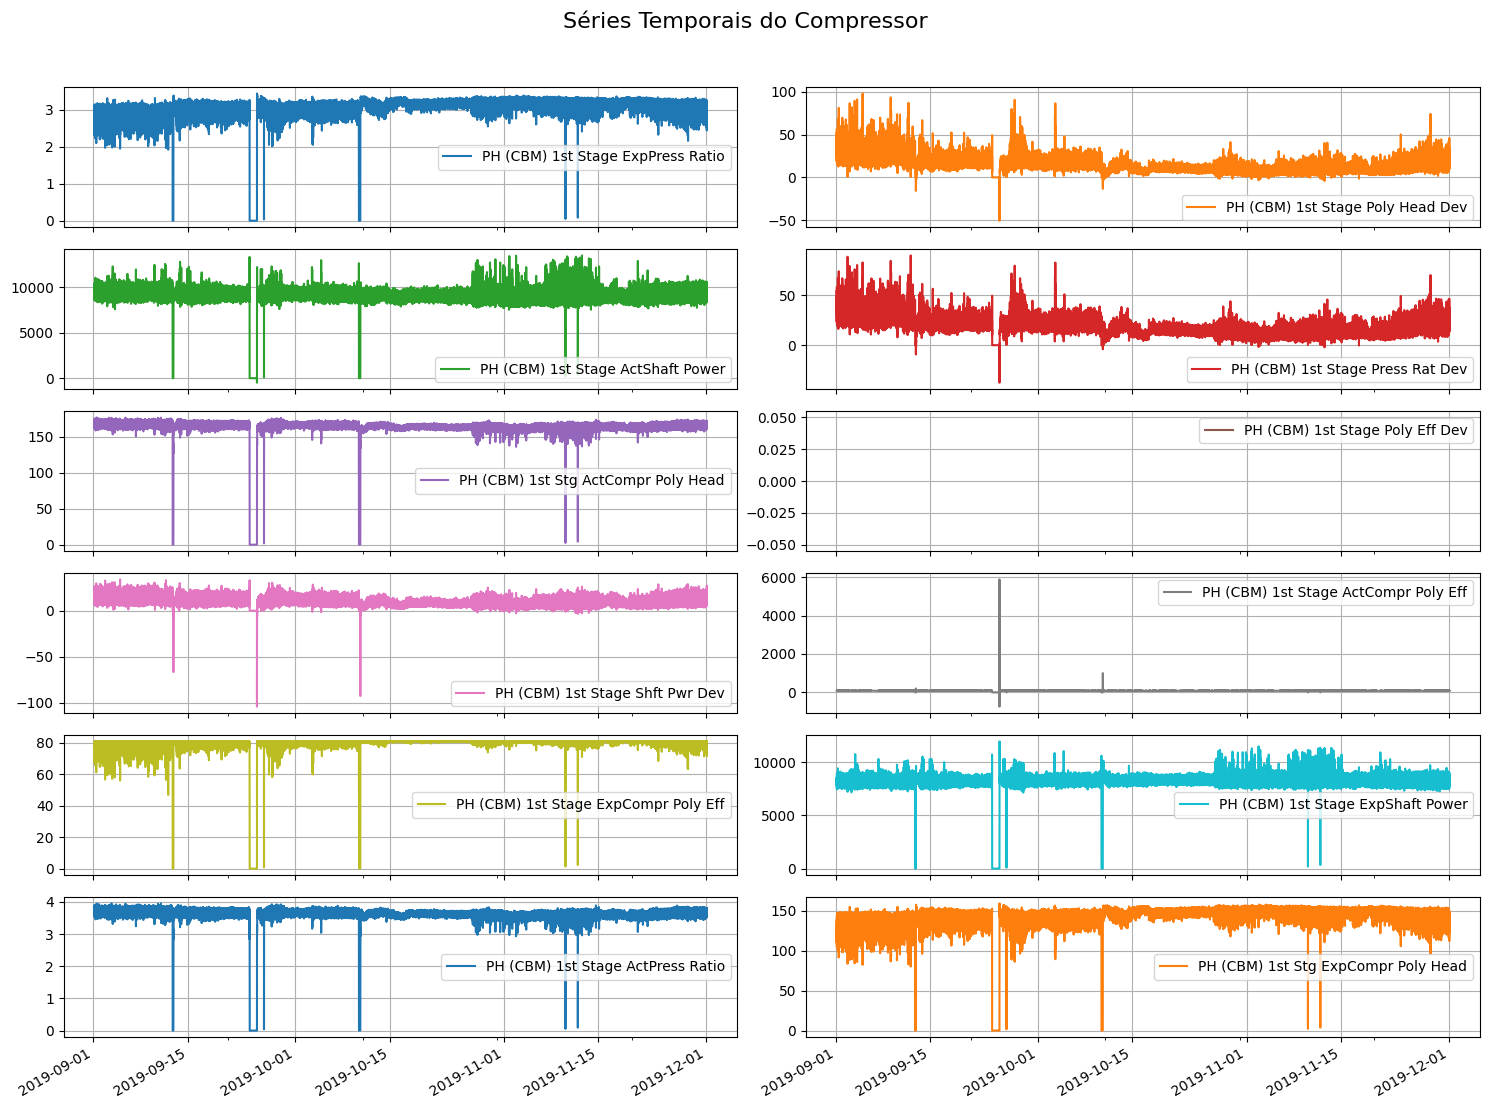

In [29]:
if not df_data_descriptive.empty:
    # Interpola valores nulos para melhor visualização
    df_plot = df_data_descriptive.interpolate()
    df_plot.plot(figsize=(15, 12), subplots=True, layout=(-1, 2), sharex=True, grid=True)
    plt.suptitle("Séries Temporais do Compressor", y=0.92, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.9]) # Ajuste de layout para evitar sobreposição do título
    plt.show()
else:
    print("DataFrame de dados está vazio.")

**b) Distribuição das Variáveis (Histogramas)**

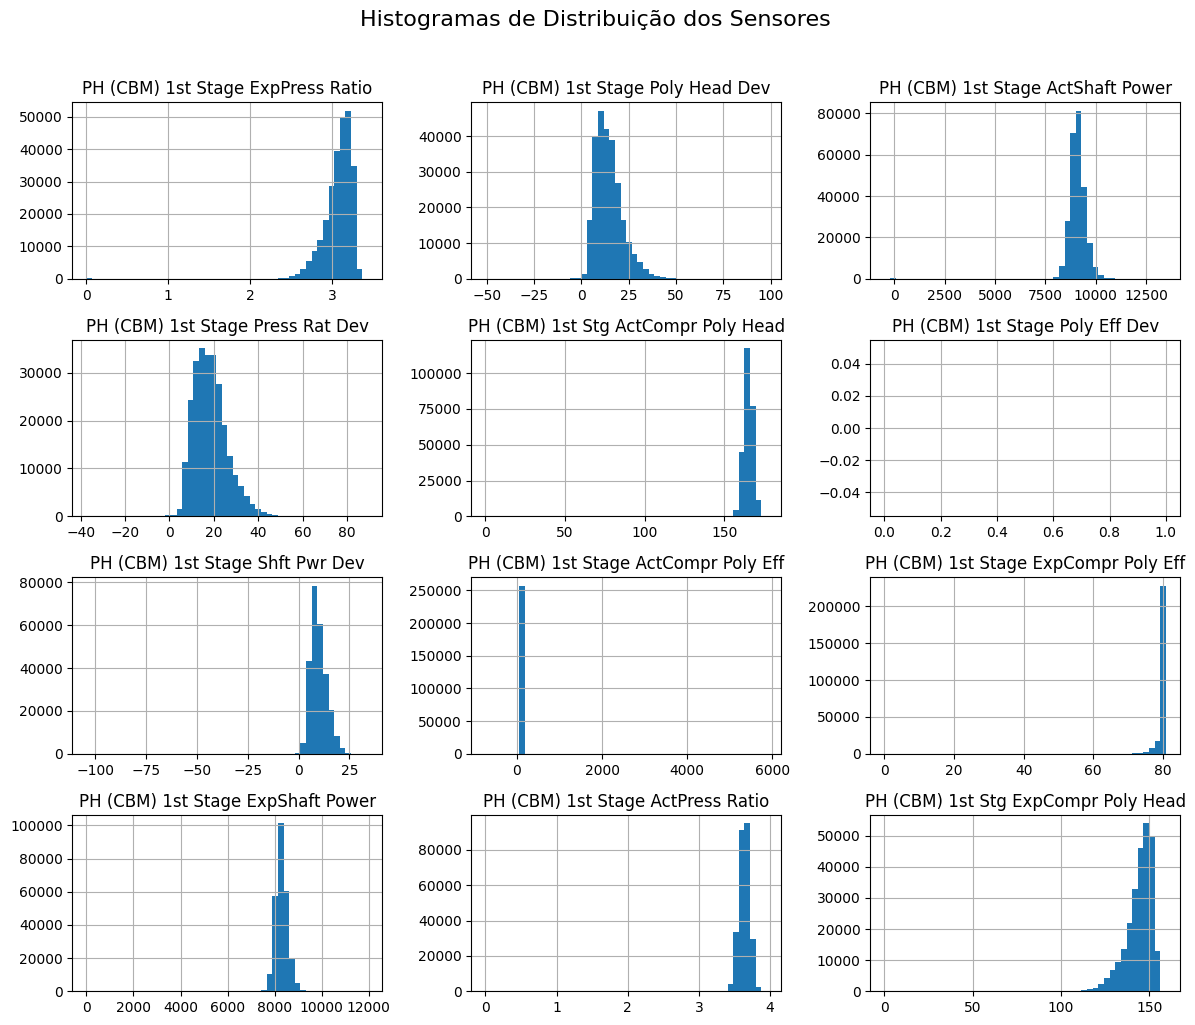

In [30]:
if not df_data_descriptive.empty:
    df_data_descriptive.hist(figsize=(12, 10), bins=50, layout=(-1, 3), sharex=False, sharey=False)
    plt.suptitle("Histogramas de Distribuição dos Sensores", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame de dados está vazio.")

**c) Matriz de Correlação**

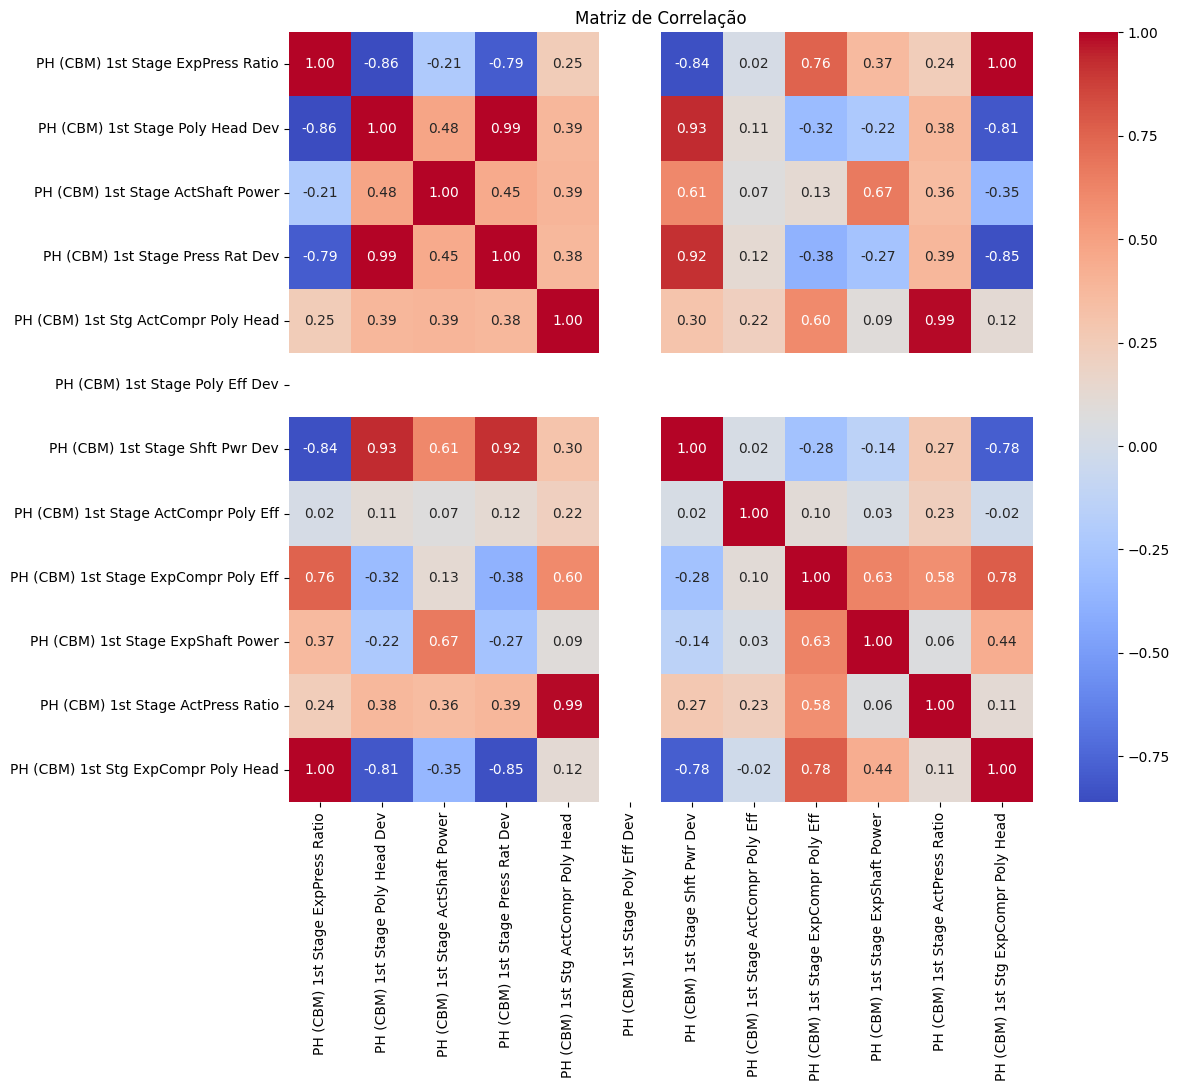

In [31]:
if not df_data_descriptive.empty:
    # Renomeia colunas para serem mais curtas para o gráfico de correlação
    correlation_df = df_data.rename(columns=lambda c: c.replace('PH (CBM)', '').replace(':VALUE', ''))
    # Usamos os nomes descritivos para a matriz de correlação
    correlation_matrix = df_data_descriptive.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matriz de Correlação")
    plt.show()
else:
    print("DataFrame de dados está vazio.")

#### 6.3. Análise Exploratória Adicional (Gemini)

Para aprofundar a análise, técnicas adicionais foram incluídas pelo Gemini para entender a distribuição dos dados e suas tendências temporais.

* **Box Plots:** Ajudam a identificar a dispersão, a mediana e os outliers em cada sensor, oferecendo uma visão clara da variabilidade.
* **Estatísticas Móveis:** O cálculo da média e do desvio padrão em janelas de tempo deslizantes revela tendências e mudanças na volatilidade dos sinais, que são difíceis de perceber em gráficos estáticos.
* **Gráficos Interativos:** Permitem uma exploração mais detalhada e flexível dos dados, com zoom e informações pontuais.

**d) Box Plots para Distribuição e Outliers**

In [ ]:
if not df_data_descriptive.empty:
    # Usa o dataframe com nomes descritivos
    df_melt = df_data_descriptive.drop(columns=['PH (CBM) 1st Stage Poly Eff Dev']).melt() # Remove a coluna vazia

    fig = px.box(df_melt, x='variable', y='value', color='variable',
                 title="Distribuição e Outliers por Sensor")
    fig.update_xaxes(title_text="Sensor")
    fig.update_yaxes(title_text="Valor")
    fig.show()
else:
    print("DataFrame de dados está vazio.")

**e) Análise de Tendências com Estatísticas Móveis**

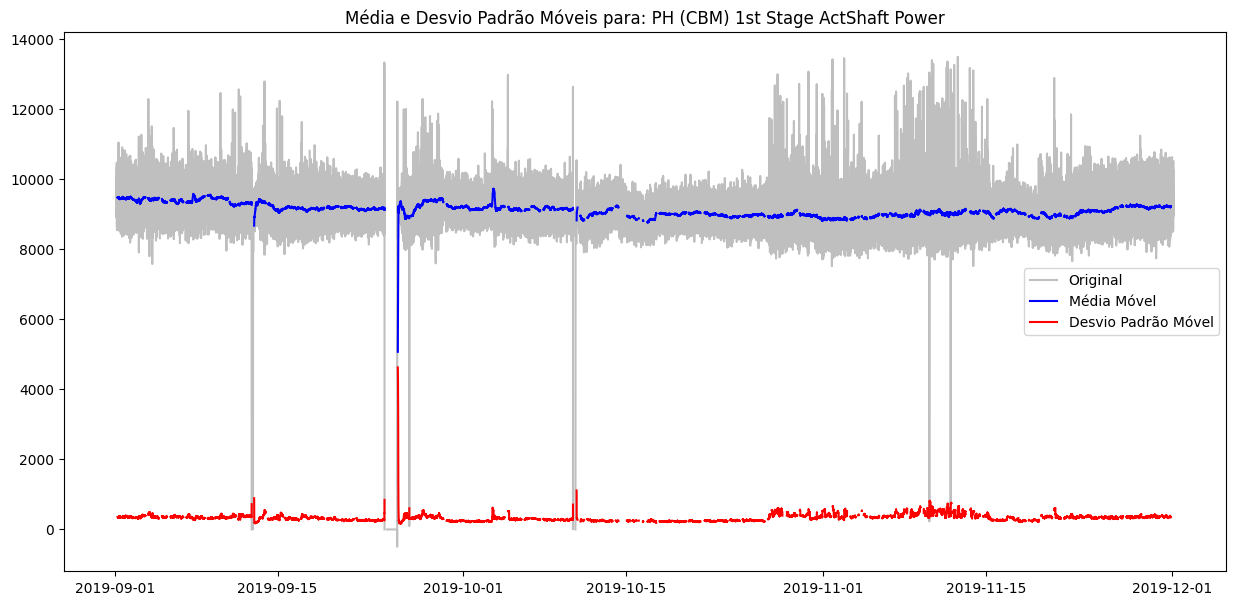

In [33]:
power_sensor = 'PH (CBM) 1st Stage ActShaft Power' # Usando o nome descritivo
if power_sensor in df_data_descriptive.columns:
    window = 288 # Janela de 1 dia (288 pontos de 5min)

    rolling_mean = df_data_descriptive[power_sensor].rolling(window=window).mean()
    rolling_std = df_data_descriptive[power_sensor].rolling(window=window).std()

    plt.figure(figsize=(15, 7))
    plt.title(f'Média e Desvio Padrão Móveis para: {power_sensor}')
    plt.plot(df_data_descriptive.index, df_data_descriptive[power_sensor], label='Original', color='gray', alpha=0.5)
    plt.plot(rolling_mean, label='Média Móvel', color='blue')
    plt.plot(rolling_std, label='Desvio Padrão Móvel', color='red')
    plt.legend()
    plt.show()
else:
    print(f"A coluna '{power_sensor}' não foi encontrada.")

**f) Gráfico Interativo das Séries Temporais**

In [ ]:
if not df_data_descriptive.empty:
    fig = px.line(df_data_descriptive.interpolate(), title='Séries Temporais Interativas do Compressor')
    fig.update_xaxes(title_text="Data e Hora")
    fig.update_yaxes(title_text="Valor do Sensor")
    fig.show()
else:
    print("DataFrame de dados está vazio.")

---

### 8. Análise de janela ideal

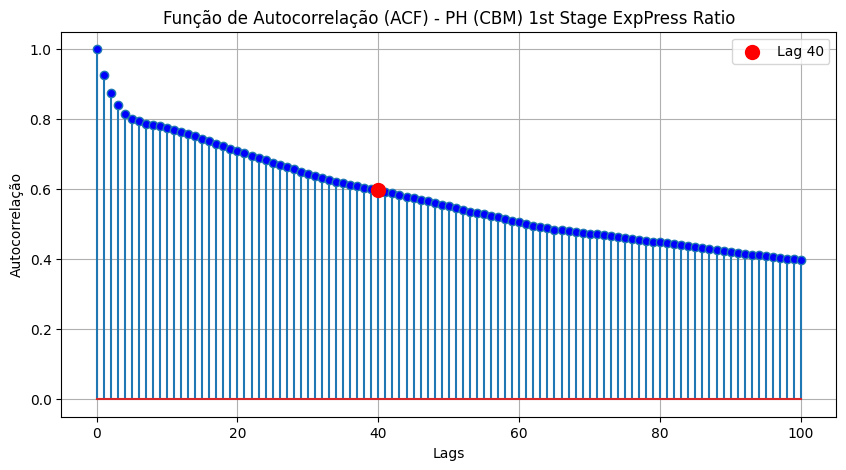

In [16]:
df = df_data_descriptive.copy()
df.bfill(inplace=True)
df.ffill(inplace=True)
acf_values = acf(df['PH (CBM) 1st Stage ActPress Ratio'], nlags=100, fft=True)
lags = np.arange(len(acf_values))

plt.figure(figsize=(10, 5))
markerline, stemlines, baseline = plt.stem(lags, acf_values)
plt.setp(markerline, 'markerfacecolor', 'blue')  # cor padrão

# Destacar lag=30
plt.scatter(40, acf_values[40], color='red', s=100, zorder=3, label='Lag 40')

plt.title('Função de Autocorrelação (ACF) - PH (CBM) 1st Stage ExpPress Ratio')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.grid()
plt.legend()
plt.show()
 

In [14]:
acf_values

array([1.        , 0.92501796, 0.87452033, 0.84156798, 0.81413884,
       0.80082331, 0.79424166, 0.787741  , 0.78316597, 0.77941528,
       0.77431126, 0.76969723, 0.76444052, 0.75768771, 0.75074146,
       0.74391665, 0.73667186, 0.73017634, 0.72305676, 0.71603248,
       0.70930206, 0.70217579, 0.69571386, 0.68918295, 0.68250459,
       0.67575312, 0.6691628 , 0.66302265, 0.65657892, 0.65030804,
       0.64418586, 0.63797706, 0.63211807, 0.62598373, 0.62060192,
       0.61640144, 0.61255359, 0.60858318, 0.60470919, 0.60101575,
       0.59687159, 0.59288386, 0.58874554, 0.58375851, 0.57902712,
       0.57397055, 0.56955655, 0.56534887, 0.56108574, 0.55627669,
       0.55080334, 0.54542199, 0.54063974, 0.53617446, 0.53198362,
       0.52793933, 0.52369015, 0.51942601, 0.51484929, 0.51033945,
       0.50552684, 0.50009935, 0.49514914, 0.49166806, 0.48812999,
       0.48479502, 0.48228219, 0.47995272, 0.47765965, 0.4752904 ,
       0.47310964, 0.47079025, 0.46821857, 0.46551039, 0.46283

### 9.1 6 estados

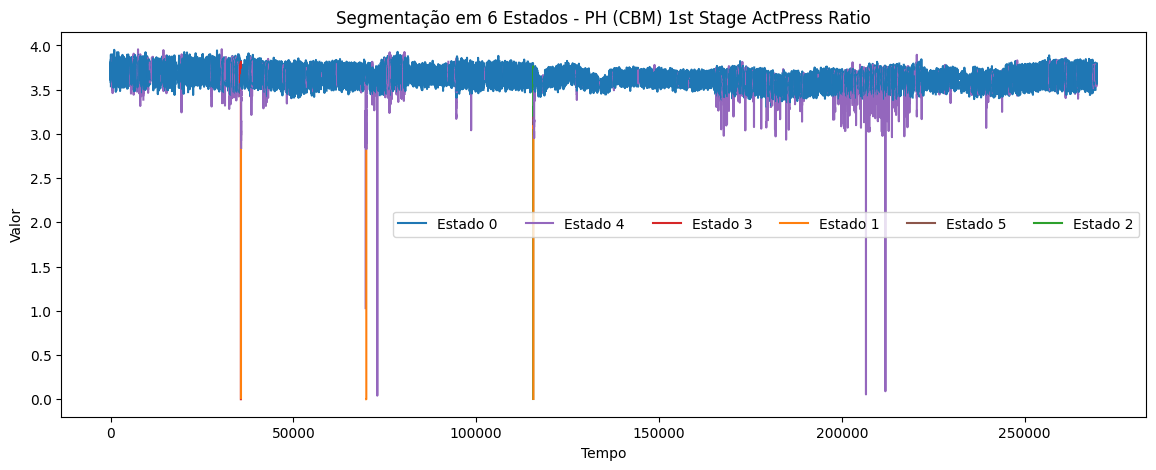

In [362]:
series = np.asarray(dl.df['PH (CBM) 1st Stage ActPress Ratio'])  # sua série original
idx = dl.pred["window_indices"]  # lista de (start, end) das janelas
states = dl.pred["states_per_window"]       # estado por janela
k = len(np.unique(states))   # número de estados únicos

plt.figure(figsize=(14, 5))

for (start, end), state in zip(idx, states):
    plt.plot(
        range(start, end),
        series[start:end],
        label=f"Estado {state}",
        color=plt.cm.tab10(state % 10)  # cores automáticas
    )

plt.title("Segmentação em 6 Estados - PH (CBM) 1st Stage ActPress Ratio")
plt.xlabel("Tempo")
plt.ylabel("Valor")
# legenda compacta sem duplicados
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=k)
plt.show()

### 10 Pós-processamento

In [15]:
for i in [2,3,5]:
    dl.df['states'].replace(i, 1, inplace=True) # Merge states 1 and 2


/tmp/ipykernel_9996/2403701232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dl.df['states'].replace(i, 1, inplace=True) # Merge states 1 and 2


In [16]:
dl.add_time_to_change_state_timestamp()

### Predição de mudança Deep

In [45]:
from tsdiffusion_transformed.deep import TSDF_DEEP

In [68]:
model = TSDF_DEEP(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 0.0, 1.0],
    status_dim=3,
    sigma_temp=1e-8,
    log_likelihood = False,
    use_layernorm=False
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [69]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-4]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
    predict_state_cols=[f'state-{i}' for i in [0,1,4]],
    kl_end=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_state_deep_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:631: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone()

GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:1038.051842 | 
          >> Test (VAE tmax) macro:0.017940 ± 0.015785 | micro:0.024249 ± 0.001145 | NLL:1.105623 cov90:0.661 width90:0.270036
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:6.727320 | 
          >> Test (VAE tmax) macro:0.003325 ± 0.001424 | micro:0.003926 ± 0.000142 | NLL:0.005375 cov90:0.955 width90:0.270036
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:1.672116 | 
          >> Test (VAE tmax) macro:0.001927 ± 0.000838 | micro:0.002718 ± 0.000120 | NLL:0.007877 cov90:0.964 width90:0.270036
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:1.393124 | 
          >> Test (VAE tmax) macro:0.002179 ± 0.000165 | micro:0.002042 ± 0.000

### Predição de mudança LSTM

In [42]:
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [70]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 0.0, 1.0],
    status_dim=3,
    sigma_temp=1e-8,
    log_likelihood = False,
    use_layernorm=False
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [71]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-4]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
    predict_state_cols=[f'state-{i}' for i in [0,1,4]],
    kl_end=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_state_lstm_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:631: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone()

GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:32.503743 | 
          >> Test (VAE tmax) macro:0.042259 ± 0.034342 | micro:0.008724 ± 0.000468 | NLL:0.229412 cov90:0.857 width90:0.270036
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:3.465434 | 
          >> Test (VAE tmax) macro:0.002073 ± 0.000206 | micro:0.001870 ± 0.000054 | NLL:0.000000 cov90:1.000 width90:0.270036
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:1.055589 | 
          >> Test (VAE tmax) macro:0.002330 ± 0.000609 | micro:0.002725 ± 0.000117 | NLL:0.000675 cov90:0.973 width90:0.270036
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:0.862062 | 
          >> Test (VAE tmax) macro:0.002277 ± 0.000127 | micro:0.002189 ± 0.00007

### Predição de mudança GRU

In [ ]:
from tsdiffusion_transformed.gru import TSDF_GRU

In [72]:
model = TSDF_GRU(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 0.0, 1.0],
    status_dim=3,
    sigma_temp=1e-8,
    log_likelihood = False,
    use_layernorm=False
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [73]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-4]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
    predict_state_cols=[f'state-{i}' for i in [0,1,4]],
    kl_end=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_state_gru_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:631: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone()

GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:30.853170 | 
          >> Test (VAE tmax) macro:0.010163 ± 0.003965 | micro:0.006266 ± 0.000320 | NLL:0.119490 cov90:0.920 width90:0.270036
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:2.544405 | 
          >> Test (VAE tmax) macro:0.001880 ± 0.000339 | micro:0.002145 ± 0.000084 | NLL:0.000747 cov90:0.982 width90:0.270036
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:0.809135 | 
          >> Test (VAE tmax) macro:0.001257 ± 0.000535 | micro:0.001784 ± 0.000049 | NLL:0.000000 cov90:1.000 width90:0.270036
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:0.453632 | 
          >> Test (VAE tmax) macro:0.001913 ± 0.000908 | micro:0.002805 ± 0.00012

### Predição de mudança BiLSTM

In [56]:
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [74]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 0.0, 1.0],
    status_dim=3,
    sigma_temp=1e-8,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [75]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-4]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
    predict_state_cols=[f'state-{i}' for i in [0,1,4]],
    kl_end=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_state_bilstm_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:631: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone()

GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:46.882989 | 
          >> Test (VAE tmax) macro:0.005114 ± 0.002373 | micro:0.007446 ± 0.000308 | NLL:0.112372 cov90:0.866 width90:0.270036
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:2.311949 | 
          >> Test (VAE tmax) macro:0.002686 ± 0.001380 | micro:0.003885 ± 0.000143 | NLL:0.006457 cov90:0.964 width90:0.270036
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:0.828736 | 
          >> Test (VAE tmax) macro:0.007711 ± 0.003527 | micro:0.004246 ± 0.000159 | NLL:0.017216 cov90:0.964 width90:0.270036
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:1.115339 | 
          >> Test (VAE tmax) macro:0.001160 ± 0.000586 | micro:0.001736 ± 0.00007

### Predição de mudança BiGRU

In [63]:
importlib.reload(sys.modules['tsdiffusion_transformed.gru'])
from tsdiffusion_transformed.gru import TSDF_GRU

In [76]:
model = TSDF_GRU(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 0.0, 1.0],
    status_dim=3,
    sigma_temp=1e-8,
    log_likelihood = False,
    use_layernorm=False,
    bi_gru=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [77]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-4]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
    predict_state_cols=[f'state-{i}' for i in [0,1,4]],
    kl_end=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_state_bigru_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:631: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone()

GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:41.254228 | 
          >> Test (VAE tmax) macro:0.004243 ± 0.002204 | micro:0.005173 ± 0.000263 | NLL:0.075586 cov90:0.946 width90:0.270036
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:2.118350 | 
          >> Test (VAE tmax) macro:0.001984 ± 0.000289 | micro:0.001762 ± 0.000073 | NLL:0.000000 cov90:0.991 width90:0.270036
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:1.217933 | 
          >> Test (VAE tmax) macro:0.001382 ± 0.000546 | micro:0.001912 ± 0.000091 | NLL:0.004255 cov90:0.982 width90:0.270036
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:0.779578 | 
          >> Test (VAE tmax) macro:0.002097 ± 0.000198 | micro:0.001917 ± 0.00006

### Predição de mudança BiLSTM AdamW com Warm Up e Learning Rate Scheduling

In [ ]:
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [78]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 0.0, 1.0],
    status_dim=3,
    sigma_temp=1e-8,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [79]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-4]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
    predict_state_cols=[f'state-{i}' for i in [0,1,4]],
    kl_end=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=50,
    min_lr_factor=0.1,
    optimizer_name='adamw',
    optimizer_params={'weight_decay': 1e-4}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_state_bilstm_adamw.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:631: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone()

GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:72.868970 | 
          >> Test (VAE tmax) macro:0.030145 ± 0.010874 | micro:0.019949 ± 0.001182 | NLL:0.981093 cov90:0.786 width90:0.270036
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:28.614031 | 
          >> Test (VAE tmax) macro:0.029702 ± 0.022828 | micro:0.007335 ± 0.000613 | NLL:0.196261 cov90:0.920 width90:0.270036
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:2.950136 | 
          >> Test (VAE tmax) macro:0.002471 ± 0.000965 | micro:0.003224 ± 0.000117 | NLL:0.005648 cov90:0.982 width90:0.270036
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:1.097612 | 
          >> Test (VAE tmax) macro:0.003829 ± 0.000463 | micro:0.003393 ± 0.0001

### Predição de mudança BiLSTM RAdam

In [ ]:
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [82]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 0.0, 1.0],
    status_dim=3,
    sigma_temp=1e-8,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [83]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-4]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
    predict_state_cols=[f'state-{i}' for i in [0,1,4]],
    kl_end=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=0.01,
    optimizer_name='radam',
    optimizer_params={'weight_decay': 1e-4}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_state_bilstm_radam.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:631: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone()

GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:56.178928 | 
          >> Test (VAE tmax) macro:0.011004 ± 0.004691 | micro:0.015610 ± 0.000836 | NLL:0.620721 cov90:0.795 width90:0.270036
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:25.185192 | 
          >> Test (VAE tmax) macro:0.013557 ± 0.004117 | micro:0.009512 ± 0.000486 | NLL:0.261108 cov90:0.830 width90:0.270036
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:4.398437 | 
          >> Test (VAE tmax) macro:0.001194 ± 0.000311 | micro:0.001499 ± 0.000044 | NLL:0.000000 cov90:1.000 width90:0.270036
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:1.068560 | 
          >> Test (VAE tmax) macro:0.004426 ± 0.002393 | micro:0.002080 ± 0.0001

### Predição de mudança BiLSTM com Variational Dropout (0.1)

In [ ]:
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [85]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 0.0, 1.0],
    status_dim=3,
    sigma_temp=1e-8,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru',
    variational_dropout=0.1
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [86]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-4]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=40,
    window_step=40,
    epochs = 500,
    validate=False,
    patience=50,
    predict_state_cols=[f'state-{i}' for i in [0,1,4]],
    kl_end=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_state_bilstm_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/ode_jump.py:570: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ints = dt_values.view("int64").astype(float)
/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:631: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone()

GRUPOS (total): {0: 6372, 1: 12, 4: 361}
GRUPOS (train): {0: 5098, 1: 10, 4: 289}
GRUPOS (test):  {0: 1274, 1: 2, 4: 72}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:31.588565 | 
          >> Test (VAE tmax) macro:0.003911 ± 0.000896 | micro:0.004532 ± 0.000218 | NLL:0.046504 cov90:0.929 width90:0.270036
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:1.499309 | 
          >> Test (VAE tmax) macro:0.001908 ± 0.000159 | micro:0.001766 ± 0.000051 | NLL:0.000000 cov90:1.000 width90:0.270036
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:0.789996 | 
          >> Test (VAE tmax) macro:0.001556 ± 0.000055 | micro:0.001512 ± 0.000054 | NLL:0.000000 cov90:1.000 width90:0.270036
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.000000 L6:0.947817 | 
          >> Test (VAE tmax) macro:0.001484 ± 0.000388 | micro:0.001838 ± 0.00007